<a href="https://colab.research.google.com/github/MikeXL/brain/blob/master/iris_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu90/torch_nightly.html

Looking in links: https://download.pytorch.org/whl/nightly/cu90/torch_nightly.html


In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [189]:
from sklearn import datasets
wine = datasets.load_wine()
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

**!!** *normalize* the input

In [0]:
model = nn.Sequential(
  nn.Linear(13,24),
  nn.ReLU(),
  nn.Linear(24,12),
  nn.ReLU(),
  nn.Linear(12,3),
  nn.Softmax(1)
)

In [0]:
x = torch.from_numpy(wine.data).float()
y = torch.from_numpy(wine.target).long()

In [0]:
epoch = 500
lr = .1

In [370]:
# train L-BFGS


optim = torch.optim.LBFGS(model.parameters(), lr=lr)
loss_lbfgs = []
model.train()

for _ in range(epoch):
  def closure():
    optim.zero_grad()
    yhat = model(x)
    loss = nn.CrossEntropyLoss()(yhat, y)
    loss_lbfgs.append(loss.item())
    loss.backward()
    return loss
optim.step(closure)



tensor(0.5514, grad_fn=<NllLossBackward>)

In [0]:
optim_adam = torch.optim.Adam(model.parameters(), lr=lr)
optim_sgd = torch.optim.SGD(model.parameters(), lr=lr)
optim_rmsprop = torch.optim.RMSprop(model.parameters(), lr=lr)


def train(optim):
  losses = []
  for _ in range(epoch):
    optim.zero_grad()
    yhat = model(x)
    loss = nn.CrossEntropyLoss()(yhat, y)
    losses.append(loss.item())
    loss.backward()
    optim.step()
  return losses


model.train()
loss_adam = train(optim_adam)

model.train()
loss_sgd = train(optim_sgd)

model.train()
loss_rmsprop = train(optim_rmsprop)

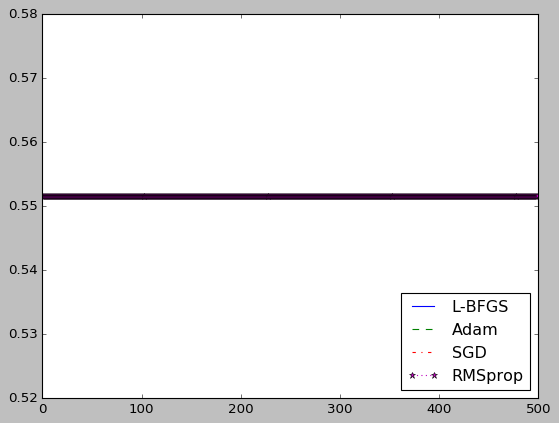

In [371]:
plt.plot(loss_lbfgs, 'b-', label="L-BFGS")
plt.plot(loss_adam, 'g--', label="Adam")
plt.plot(loss_sgd, 'r-.', label="SGD")
plt.plot(loss_rmsprop, 'm:*', label="RMSprop")
plt.legend(loc="lower right")
plt.style.use('fast')

In [372]:
print np.mean(loss_lbfgs)
print np.mean(loss_adam)
print np.mean(loss_sgd)
print np.mean(loss_rmsprop)

0.551444947719574
0.551444947719574
0.551444947719574
0.551444947719574


In [0]:
with torch.no_grad():
  pred = model(torch.from_numpy(wine.data).float())
  l = lf(pred, torch.from_numpy(wine.target).long())
  
l

In [0]:
model.eval()
out=model(torch.from_numpy(wine.data).float())
_, p = torch.max(out, 1)

In [325]:
p

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [323]:
print optim.state_dict
print optim_adam.state_dict
print optim_sgd.state_dict
print optim_rmsprop.state_dict

<bound method LBFGS.state_dict of LBFGS (
Parameter Group 0
    history_size: 100
    line_search_fn: None
    lr: 0.1
    max_eval: 25
    max_iter: 20
    tolerance_change: 1e-09
    tolerance_grad: 1e-05
)>
<bound method Adam.state_dict of Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.1
    weight_decay: 0
)>
<bound method SGD.state_dict of SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)>
<bound method RMSprop.state_dict of RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.1
    momentum: 0
    weight_decay: 0
)>
